# OpenCV. РОБОТА із ЗОБРАЖЕННЯМИ
## Файл: CV_Image_06_001

### Морфологічні перетворення

#### SEE [Morphological Transformations](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html#:~:text=Two%20basic%20morphological%20operators%20are%20Erosion%20and%20Dilation.)
#### SEE [Eroding and Dilating](https://docs.opencv.org/2.4/doc/tutorials/imgproc/erosion_dilatation/erosion_dilatation.html#morphology-1)
#### SEE [More Morphology Transformations](https://docs.opencv.org/2.4/doc/tutorials/imgproc/opening_closing_hats/opening_closing_hats.html#morphology-2)

In [4]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt # this lets you draw inline pictures in the notebooks
import skimage.io as io
plt.rcParams['font.size'] = 10

In [5]:
import cv2 as cv
print (cv.__version__)

4.10.0


In [6]:
# ВИзначення та друк параметрів зображення
def image_data (image):
    rank     = len(image.shape)
    rows_num = image.shape[0] ## кількість рядків
    clms_num = image.shape[1] ## кількість колонок
    chen_num = 1
    if rank == 3: 
        chen_num = image.shape[2] ## кількість каналів
    print('Опис зображення ')
    print('IMAGE RANK',  rank)
    print('IMAGE SHAPE', image.shape)
    print('DATA Type',   image.dtype)
    return rows_num,clms_num, chen_num

In [7]:
# Convert ONE image from BGR to RGB & out
def image1_view (image, image_name):
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(4, 4))
    plt.title(image_name)
    plt.imshow(rgb_image)
    plt.show()
    return 

In [8]:
# Convert TWO image from BGR to RGB & out
def image2_view (image1, image2, image1_name, image2_name):
    rgb_image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
    rgb_image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].set_title(image1_name)
    ax[0].imshow(rgb_image1)
    ax[1].set_title(image2_name)
    ax[1].imshow(rgb_image2)
    plt.show()
    return

OpenCV надає низку функцій, що підтримують морфологічні перетворення із зображеннями. Це, в першу чергу,
- Дилатація (збільшення, Dilation). Функція cv.dilate(),
- Ерозія  (звуженння, Erosion). Функція cv.erode(),
- Розширене морфологічні перетворення. Функція  cv.morphologyEx(


#### Дилатація (збільшення, Dilation). Функція cv.dilate(),

cv.dilate(src, dst, element=None, iterations=1) → None

| Параметри:        |                                                              |
| :----------------- | ------------------------------------------------------------ |
| **src**–         | Вхідне зображення. Кількість каналів довільна, але глибина повинна бути  з  CV_8U, CV_16U,  CV_16S, CV_32F or  CV_64F |
| **dst**–         | Вихідне зображення, того ж розміру та типу, як src           |
| **element**  –     | структурний елемент, що використвується для ерозії. Якщо  element=Mat() використвується квалратний елемент розміром елемент розміром   `3 x 3` |
| **anchor**–      | Позиція прив’язки всередині елемента. Обидва від’ємні значення (-1, -1) означають, що прив’язка знаходиться в центрі ядра. |
| **iterations**   – | кількість повторів операції ерозії                           |
| **borderType**–  | метод  екстраполяції значень пікселів на границях зображення (дивись   **borderInterpolate**). |
| **borderValue** –  | констнтне значення границі в випадку constant border         |

Функція розширює вихідне зображення, використовуючи вказаний структурний елемент, який визначає форму околиці пікселя, для якої береться максимум:

$$ \texttt{dst} (x,y) =  \max _{(x',y'):  \, \texttt{element} (x',y') \ne0 } \texttt{src} (x+x',y+y') $$










#### Ерозія  (звуженння, Erosion). Функція cv.erode()

cv.Erode(src, dst, element=None, iterations=1) → None

Параметри аналогічні cv.delate()

Функція звужує вихідне зображення, використовуючи вказаний структурний елемент, який визначає форму околиці пікселя, для якої береться мінімум:

$$ \texttt{dst} (x,y) =  \min _{(x',y'):  \, \texttt{element} (x',y') \ne0 } \texttt{src} (x+x',y+y')$$




#### Розширене морфологічні перетворення. Функція cv.morphologyEx()
За використанням функції morphologyEx() можна вионати наступні морфологічні операції:
- Opening
- Closing
- Morphological Gradient
- Top Hat
- Blac ->dst


cv.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) ->dst

Функція  може виконувати розширені морфологічні перетворення, використовуючи **erode** та **dilate** як основні операції.
У випадку багатоканальних зображень кожен канал обробляється незалежно.

| Параметри       |                                                              |
| --------------- | ------------------------------------------------------------ |
| **src**         | Вхідне зображення.                                           |
| **op**          | Вид морфологічної операції                                   |
| **kernel**      | Структуруючий елемент. Його можна створити за допомогою getStructuringElement |
| **anchor**      | Позиція прив’язки всередині елемента. Обидва від’ємні значення (-1, -1) означають, що прив’язка знаходиться в центрі ядра. |
| **iterations**  | Кількість застосувань ерозії та розширення.                  |
| **borderType**  | Метод піксельної екстраполяції                               |
| **borderValue** | Значення межі у випадку постійної межі. Значення за замовчуванням має особливе значення. |

| Операція          |                                                              |
| ----------------- | ------------------------------------------------------------ |
| cv.MORPH_ERODE    | erode                                                        |
| cv.MORPH_DILATE   | dilate                                                       |
| cv.MORPH_OPEN     | Відкриття $dst=open(src,element)=dilate(erode(src,element))$ |
| cv.MORPH_CLOSE    | Закриття $dst=close(src,element)=erode(dilate(src,element))$ |
| cv.MORPH_GRADIENT | Градієнт $dst=morph_grad(src,element)=dilate(src,element)−erode(src,element)$ |
| cv.MORPH_TOPHAT   | "top hat" $dst=tophat(src,element)=src−open(src,element)$    |
| cv.MORPH_BLACKHAT | "black hat" $dst=blackhat(src,element)=close(src,element)−src$ |

#### Функція створення структурного елементу: getStructuringElement()

cv.getStructuringElement(shape, ksize[, anchor]) ->retval

Функція створює та повертає структурний елемент, який можна далі передати в **erode**, **dilate** та **morphologyEx**

| Параметри |                                                              |
| --------- | ------------------------------------------------------------ |
| **shape**     | Форма елемента, який може бути одним із **MorphShapes**|
| **ksize**     | Розмір структурного елемента.                                |
| **anchor**    | Позиція прив’язки якоря всередині елемента. Значення за замовчуванням (−1,−1) означає, що прив'язка знаходиться в центрі. Зверніть увагу, що від положення анкера залежить тільки форма хрестоподібного елемента. В інших випадках якір просто регулює, наскільки зсувається результат морфологічної операції. |


| Morph **Shape**  |                                    |
| ---------------- | ---------------------------------- |
| cv.MORPH_RECT    | прямокутний структурний елемент    |
| cv.MORPH_CROSS   | хрестообразний структурний елемент |
| cv.MORPH_ELLIPSE | еліпсоідальний структурний едемент |

##### ! Можна і самостійно створити довільну бінарну маску та використовувати її як структурний елемент.

#### Читання тестового зображення

In [88]:
## Завантаження файлу зображення
path = './IMAGES/'
# filename = 'Morfo_BW_1.jpg' 
filename = 'Morfo_Cl_2.jpg' 
test_img_ = cv.imread(path + filename)
## Визначення стркутури та розміру зображення
image_data (test_img_)

Опис зображення 
IMAGE RANK 3
IMAGE SHAPE (200, 200, 3)
DATA Type uint8


(200, 200, 3)

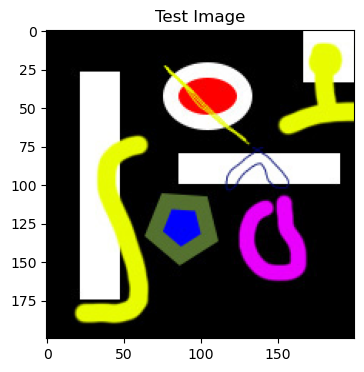

In [89]:
# Display whith Matplotlib
image1_view (test_img_, 'Test Image')

#### Приклад Dilation

In [90]:
# Створюємо структурні едементи
element3 = np.ones((3,3), np.uint8)
element5 = np.ones((5,5), np.uint8)
print ('Структурний елемент квадрат 3 Х 3 \n',element3)

Структурний елемент квадрат 3 Х 3 
 [[1 1 1]
 [1 1 1]
 [1 1 1]]


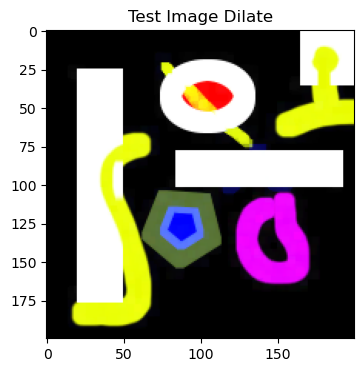

In [91]:
test_img_dilate = cv.dilate(test_img_, element5)
image1_view (test_img_dilate, 'Test Image Dilate')

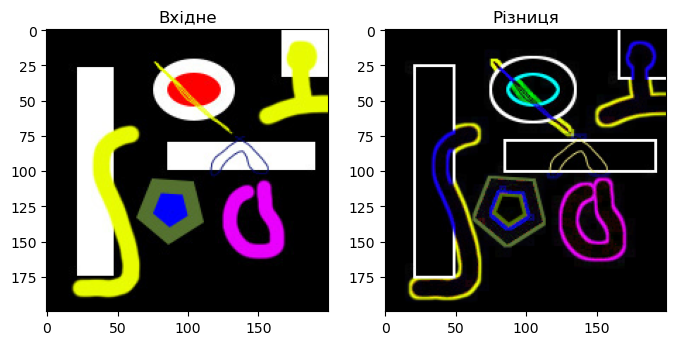

In [92]:
test_img_diff = cv.bitwise_xor(test_img_,test_img_dilate )
image2_view (test_img_, test_img_diff, "Вхідне", "Різниця")

#### Приклад Erode

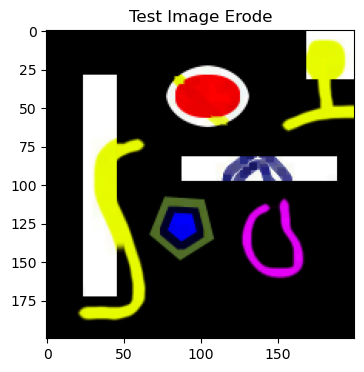

In [93]:
test_img_erode = cv.erode(test_img_, element5)
image1_view (test_img_erode, 'Test Image Erode')

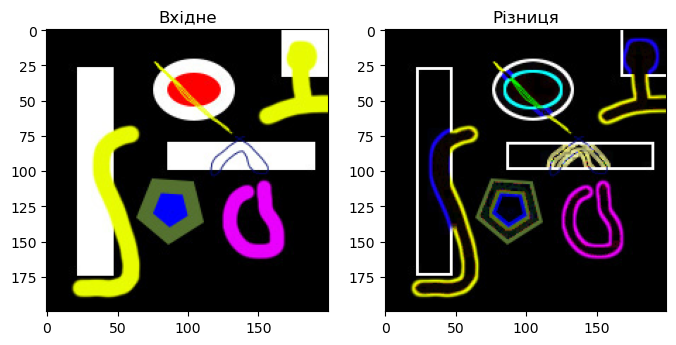

In [94]:
test_img_diff = cv.bitwise_xor(test_img_,test_img_erode)
image2_view (test_img_, test_img_diff, "Вхідне", "Різниця")

#### Богаторазрве Erode

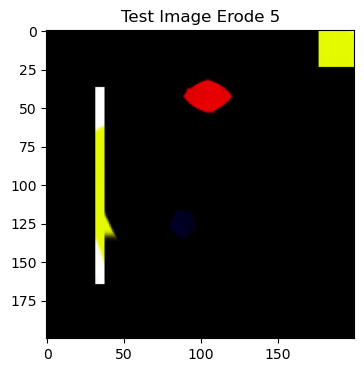

In [95]:
test_img_erode = cv.erode(test_img_, element5, iterations = 5)
image1_view (test_img_erode, 'Test Image Erode 5')

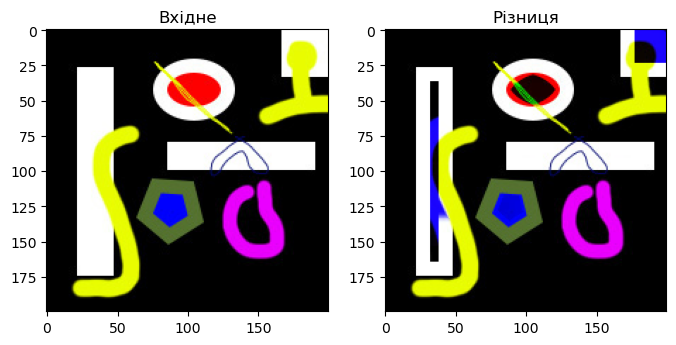

In [96]:
test_img_diff = cv.bitwise_xor(test_img_, test_img_erode)
image2_view (test_img_, test_img_diff, "Вхідне", "Різниця")

#### Приклад відкриття (Opening)

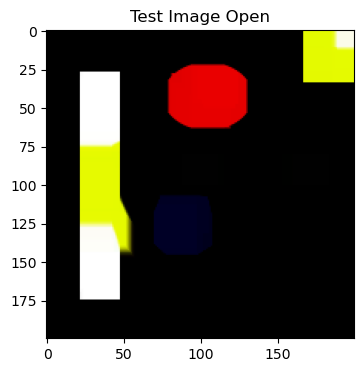

In [101]:
test_img_open = cv.morphologyEx(test_img_, cv.MORPH_OPEN, element5, iterations = 5)
image1_view (test_img_open, 'Test Image Open')

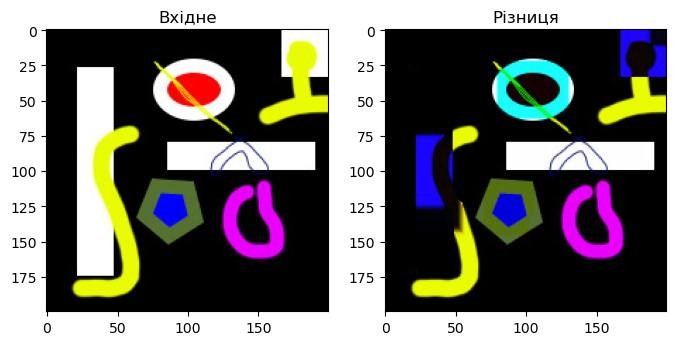

In [100]:
test_img_diff = cv.bitwise_xor(test_img_, test_img_open)
image2_view (test_img_, test_img_diff, "Вхідне", "Різниця")

#### Приклад створення структурного елементу

In [103]:
kernal = cv.getStructuringElement(cv.MORPH_CROSS, (5,3))

In [104]:
print (kernal)

[[0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]]
